# Proyek Analisis Data: Ecommerce Public Dataset
- **Nama:** Marcell Vanessa
- **Email:** marcellbanessa@gmail.com
- **ID Dicoding:** marcell_vanessa_x7bH

## Menentukan Pertanyaan Bisnis

- How is the correlation between the frequency of reviews and the average review score for sellers?
- How is the performance of review scores as time series data?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [2]:
sellers = pd.read_csv("sellers_dataset.csv")
reviews = pd.read_csv("order_reviews_dataset.csv")
customers = pd.read_csv("customers_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
products = pd.read_csv("products_dataset.csv")
geolocation = pd.read_csv("geolocation_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
product_category = pd.read_csv("product_category_name_translation.csv")
order_payments = pd.read_csv("order_payments_dataset.csv")

**Insight:**
- Seller Variable contains data about seller id, seller zip code, seller city, dan seller state
- Review Variable contains data about review ID, order ID, review score, review comment message, review creation date, dan review answer timestamp
- Customers Variable contains data about customer ID,customer unique ID, customer zip code, customer city, and customer state
- Orders Variable contains data about order ID,customer ID, order status, order purchase timestamp,time of order approval, date of order delivered to carrier, date of order delivered to customer,and date of order estimated delivery.
- Products Variable contains data about product ID,product category name, product name lenght,product description lenght, product photos qty, product weight in gram, product length in cm, product height in cm,and product width in cm
- Geolocation Variable contains data about zip code, latitude, longitude, city, and state
- Order_Items Variable contains data about order ID,order item ID, product ID, seller ID, shipping limit date, price, and freight value
- Product_Category Variable contains data about product category name and product category name in english
- Order_Payments Variable contains data about order ID,payment sequential, payment type, payment installments, and payment value.


### Assessing Data

In [3]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [4]:
reviews.info()
reviews.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [5]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
order_items.info()
order_items.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Insight:**
- From 99224 reviews data from 2016-10-02 to 2018-08-31, the average of review score is 4.086421 in range 1 to 5.
- There are 112650 total order ID from orders dataset and 99224 total order ID from reviews dataset
- There are 13426 missing reviews or around 12% customer doesn't submit their review

### Cleaning Data

In [7]:
#Inner join order_id from orders and reviews dataset
merged_data = order_items.merge(reviews, on='order_id', how='inner')

#Check the missing value
print("Number of missing value")
print(merged_data.isnull().sum())

#Check for duplicate data
duplicate_rows = merged_data[merged_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of missing value
order_id                       0
order_item_id                  0
product_id                     0
seller_id                      0
shipping_limit_date            0
price                          0
freight_value                  0
review_id                      0
review_score                   0
review_comment_title       98938
review_comment_message     64730
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Number of duplicate rows: 0


In [8]:
merged_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


**Insight:**
- We only use data that has review so we innerjoin the data from orders and reviews with order ID
- There is no missing values on data we will be using (review_score, review_creation_date, review_id)
- There is no duplicate value

## Exploratory Data Analysis (EDA)

### Explore Seller Score With RFM Methods

In [9]:
# Merge datasets to include seller information in reviews
merged_data['review_creation_date'] = pd.to_datetime(merged_data['review_creation_date'])

# Find the latest review creation date
latest_review_date = merged_data['review_creation_date'].max()

# Calculate RFM metrics based on seller_id
rfm_df = merged_data.groupby('seller_id').agg({
    'review_creation_date': lambda x: (latest_review_date - x.max()).days,  # Recency
    'review_id': 'count',  # Frequency (count of reviews per seller)
    'review_score': 'mean'  # Monetary (average review score)
}).rename(columns={
    'review_creation_date': 'Recency',
    'review_id': 'Frequency',
    'review_score': 'Monetary'
}).reset_index()

# Segmenting into quantiles
rfm_df['R_Quantile'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_Quantile'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_df['M_Quantile'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Convert quantiles to numeric type
rfm_df['R_Quantile'] = rfm_df['R_Quantile'].astype(int)
rfm_df['F_Quantile'] = rfm_df['F_Quantile'].astype(int)
rfm_df['M_Quantile'] = rfm_df['M_Quantile'].astype(int)

# Final RFM score
rfm_df['RFM_Score'] = rfm_df['R_Quantile'] + rfm_df['F_Quantile'] + rfm_df['M_Quantile']
rfm_df_sorted = rfm_df.sort_values(by='RFM_Score', ascending= False)
print(rfm_df_sorted)

                             seller_id  Recency  Frequency  Monetary  \
2575  d566c37fa119d5e66c4e9052e83ee4ea        0         71  4.718310   
1209  6338ea67c41078a46ad99cc009654956        3         41  4.609756   
100   080199a181c46c657dc5aa235411be3b        3         82  4.609756   
291   18e694e0e48ed6f7aa3f24aade5fd697        0         34  4.676471   
2624  d9bd94811c3338dceb4181f3dbc0c73e        2         61  4.819672   
...                                ...      ...        ...       ...   
2686  deaadd805612bf94faaa9fa702516e11      453          1  1.000000   
1787  9200e6ce317b67196b6b0bad4d4bd567      507          1  3.000000   
1816  9535a841eecebed61a9fb1ac1cbb5597      560          2  3.000000   
1819  9558aa23f77a9e0a0eca83540999f43b      434          2  3.000000   
2512  cf281cf8b7affbdfe751b29cc85580e1      625          1  1.000000   

      R_Quantile  F_Quantile  M_Quantile  RFM_Score  
2575           4           4           4         12  
1209           4           

### Explore With Reviews Creation Date Data

In [10]:
# Convert review creation date to datetime format and extract year and week
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_year_day'] = reviews['review_creation_date'].dt.to_period('D')

# Group by year and week to calculate average review score
review_score = reviews.groupby('review_year_day').agg(
    avg_review_score=('review_score', 'mean')
).reset_index()

# Convert review_year_day back to a datetime format for plotting
review_score['review_year_day'] = review_score['review_year_day'].dt.to_timestamp()
review_score_sorted = review_score.sort_values(by='review_year_day', ascending=False)

# Print the sorted dataframe
print(review_score_sorted)

    review_year_day  avg_review_score
635      2018-08-31          4.216931
634      2018-08-30          4.322667
633      2018-08-29          4.266667
632      2018-08-28          4.396018
631      2018-08-27          4.000000
..              ...               ...
4        2016-10-16          5.000000
3        2016-10-15          4.000000
2        2016-10-09          1.000000
1        2016-10-06          1.000000
0        2016-10-02          1.000000

[636 rows x 2 columns]


**Insight:**
- Seller with the best performance is seller with ID number d566c37fa119d5e66c4e9052e83ee4ea
- Seller with the worst performance is seller with ID number cf281cf8b7affbdfe751b29cc85580e1
- Newest date of review is 2018-08-31 that has average review score 4.216931
- Oldest date of review is 2016-10-02 that has average review score 1.000000

## Visualization & Explanatory Analysis

### Pertanyaan 1: How is the correlation between the frequency of reviews and the average review score for sellers?

<ipython-input-21-925c7ba4d4d6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='F_Segment', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1

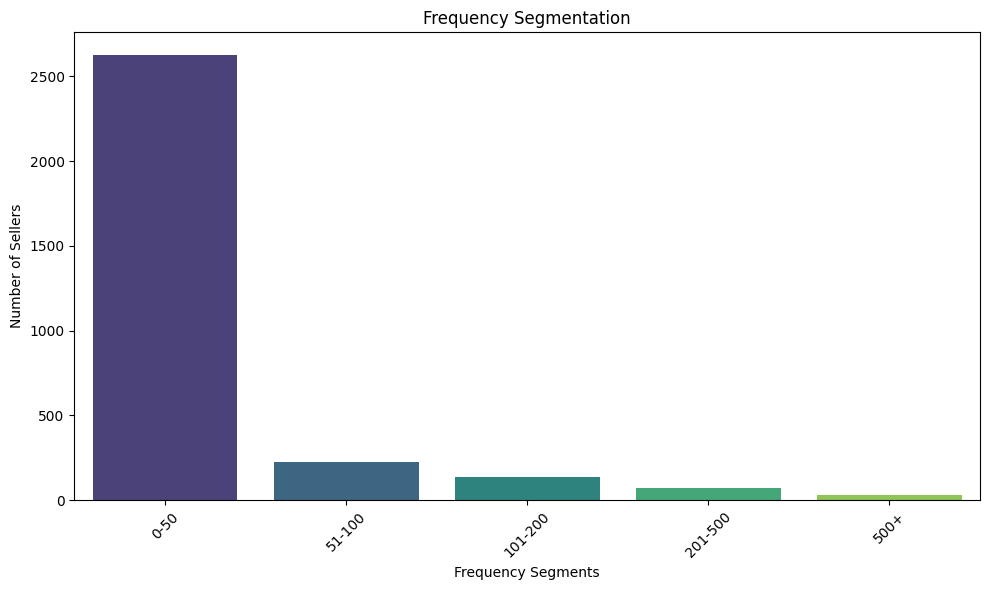

<ipython-input-21-925c7ba4d4d6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='M_Segment', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1

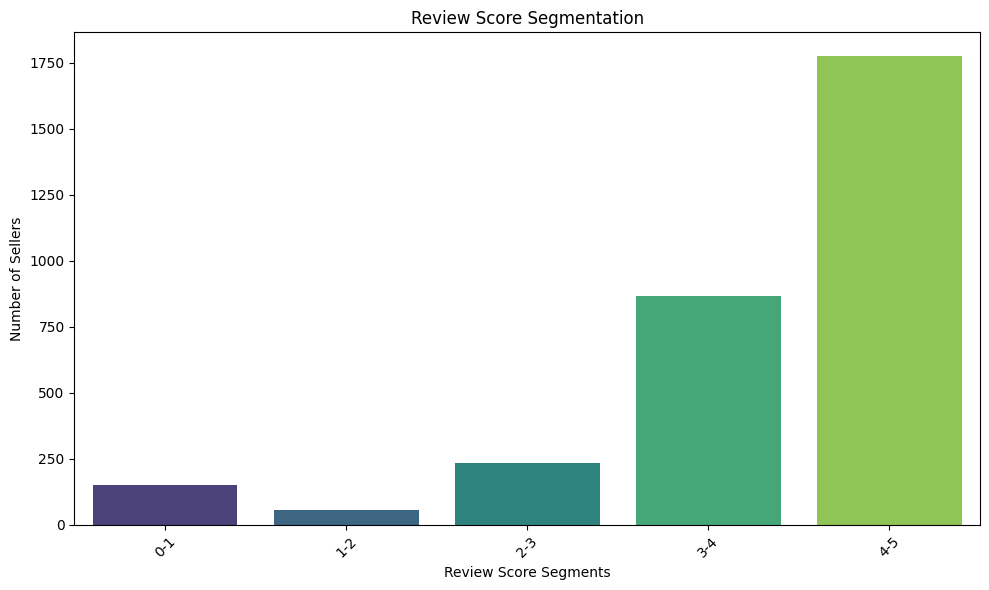

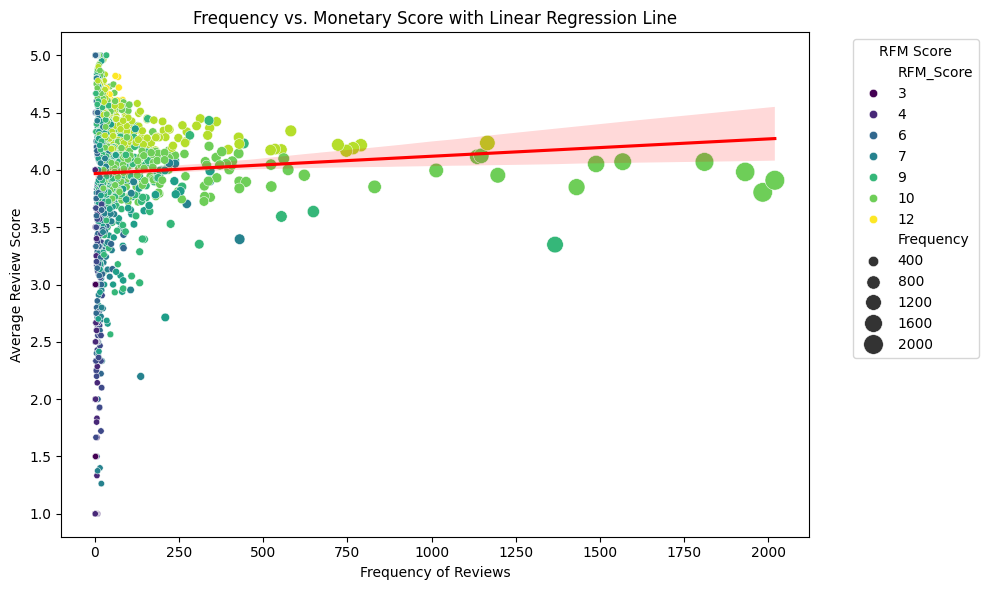

In [21]:
# Define custom bins for Frequency
frequency_bins = [0, 50, 100, 200, 500, float('inf')]
frequency_labels = ['0-50', '51-100', '101-200', '201-500', '500+']
rfm_df['F_Segment'] = pd.cut(rfm_df['Frequency'], bins=frequency_bins, labels=frequency_labels)

# Define custom bins for Monetary (Review Score)
monetary_bins = [0, 1, 2, 3, 4, 5]
monetary_labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
rfm_df['M_Segment'] = pd.cut(rfm_df['Monetary'], bins=monetary_bins, labels=monetary_labels)

# Plotting Frequency Segmentation
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_df, x='F_Segment', palette='viridis')
plt.title('Frequency Segmentation')
plt.xlabel('Frequency Segments')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Review Score Segmentation
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_df, x='M_Segment', palette='viridis')
plt.title('Review Score Segmentation')
plt.xlabel('Review Score Segments')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Scatter Plot with Linear Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary', hue='RFM_Score', palette='viridis', size='Frequency', sizes=(20, 200))
sns.regplot(data=rfm_df, x='Frequency', y='Monetary', scatter=False, color='red', line_kws={'label': 'Linear Fit'})
plt.title('Frequency vs. Monetary Score with Linear Regression Line')
plt.xlabel('Frequency of Reviews')
plt.ylabel('Average Review Score')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Pertanyaan 2: How is the performance of review scores as time series data?

    review_year_day  avg_review_score  trend_line
0        2016-10-02          1.000000    3.771998
1        2016-10-06          1.000000    3.772652
2        2016-10-09          1.000000    3.773305
3        2016-10-15          4.000000    3.773959
4        2016-10-16          5.000000    3.774613
..              ...               ...         ...
631      2018-08-27          4.000000    4.184512
632      2018-08-28          4.396018    4.185165
633      2018-08-29          4.266667    4.185819
634      2018-08-30          4.322667    4.186473
635      2018-08-31          4.216931    4.187127

[636 rows x 3 columns]


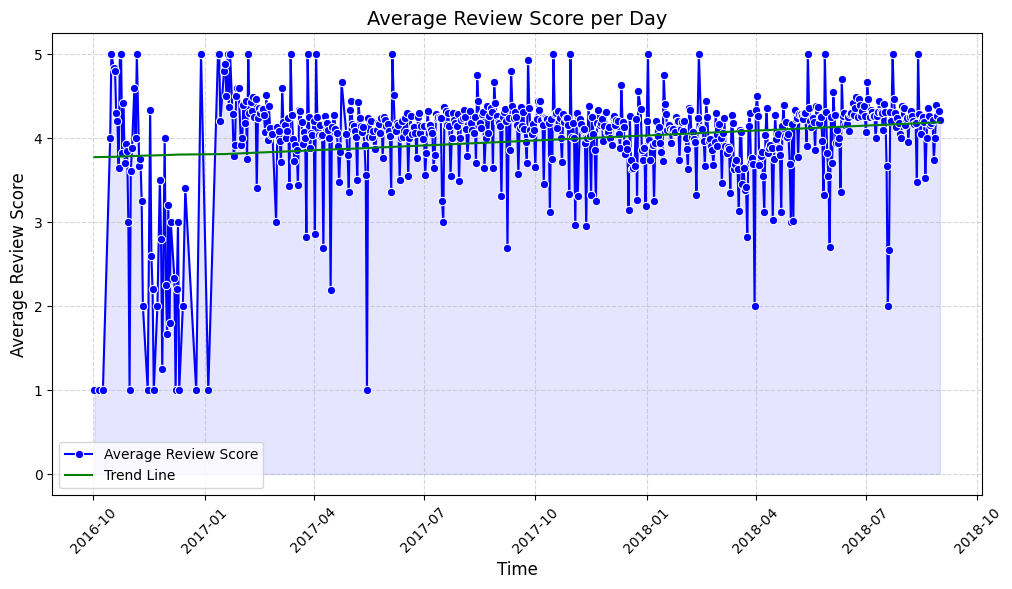

In [12]:
# Fit a linear regression model to get the trend line
X = np.array(range(len(review_score))).reshape(-1, 1)  # Day numbers as X
y = review_score['avg_review_score'].values  # Average review scores as y

# Create model
model = LinearRegression()
model.fit(X, y)
review_score['trend_line'] = model.predict(X)
print(review_score)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_year_day', y='avg_review_score', data=review_score, marker='o', label='Average Review Score', color='blue')
sns.lineplot(x='review_year_day', y='trend_line', data=review_score, label='Trend Line', color='green', linestyle='-')

# Average score line
plt.fill_between(review_score['review_year_day'],
                 review_score['avg_review_score'],
                 color='blue', alpha=0.1)

# Plot
plt.title('Average Review Score per Day', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

**Insight:**
- (1) The correlation between purchase frequency and review scores is not strong. It shows that the scatter plot does not shows any linear line that has gradien = 1
- (1) The majority of the frequency of selling clustered in left side of the graph that means most of seller has low frequency of selling which is 0-50 sellings
- (1) The majority of the review score is on range 4-5
- (1) The increase of RFM score alligns with the review average score
- (2) Over time, the average review score increased from an average of 1 at 2016-10 to 4.3 in 2018-10.
- (2) The trendline has a positive gradien

## Analisis Lanjutan (Opsional)

In [16]:
# Correlation frequency of selling with review score
correlation = rfm_df['Frequency'].corr(rfm_df['Monetary'])
print(f'Correlation between frequency of selling and review score: {correlation:.2f}')

Correlation between frequency of selling and review score: 0.02


## Conclusion

- (1) The average review score shows no correlation with the number of sales made by the seller. This observation implies that consumers in the e-commerce sector are not significantly influenced by the sales figures of a seller when deciding which products to purchase. The majority of the frequency of selling is clustered on the left side of the graph, indicating that most sellers have a low frequency of sales, specifically between 0 and 50 sales. As a result, sellers seeking to enhance their sales performance should focus primarily on analyzing their review scores, particularly those with lower ratings. The majority of review scores fall within the range of 4 to 5, suggesting that while customer experiences are generally positive, there remains a significant number of sellers who are not reaching their full sales potential. By identifying areas where customer feedback indicates dissatisfaction, sellers can implement targeted improvements in their services, product quality, or customer interactions. This approach not only helps in addressing the issues highlighted in low reviews but also fosters customer loyalty and can lead to an increase in sales over time.

- (2) Overall, customer satisfaction within the e-commerce landscape is witnessing a steady improvement each day. This trend suggests that e-commerce platforms are actively working to enhance their services year after year, contributing to a higher level of customer satisfaction. The insights drawn from seller review scores are vital in this context, as they serve as a direct indicator of consumer perceptions and experiences. Therefore, it is crucial for sellers to take note of those who consistently receive low review ratings. By doing so, they can gain valuable insights into the specific aspects of their offerings or services that may require enhancement. Ultimately, focusing on improving customer experience based on feedback will not only elevate individual seller performance but also strengthen the overall reputation of the e-commerce marketplace.